# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query = f"{url}appid={weather_api_key}&units={units}&q="

#lists to hold info
cityname = []
country = []
longitude = []
latitude = []
maxtemp = []
humidity = []
clouds = []
windspeed = []
date = []
x = 1 

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# requesting for each city
for city in cities:

# Exception Handling
    try:
        response = requests.get(query + city).json()
        cityname.append(response["name"])
        country.append(response["sys"]["country"])
        longitude.append(response["coord"]["lon"])
        latitude.append(response["coord"]["lat"])
        maxtemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        city_record = response["name"]
        print(f"Processing Record {x} | {city_record}")
        
       
        # upping count for next loop
        x += 1
        
    except:
        print("City not found. Skipping...") 
    continue
    
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
Processing Record 1 | Ushuaia
Processing Record 2 | Chaiya
Processing Record 3 | Zheshart
Processing Record 4 | Punta Arenas
Processing Record 5 | Isabela
Processing Record 6 | East London
Processing Record 7 | El Salvador
Processing Record 8 | Asău
Processing Record 9 | Beloha
Processing Record 10 | Dickinson
Processing Record 11 | Yellowknife
Processing Record 12 | Jamestown
Processing Record 13 | Hilo
Processing Record 14 | Madang
Processing Record 15 | Esil
Processing Record 16 | Cabo San Lucas
Processing Record 17 | Aksu
Processing Record 18 | Beringovskiy
Processing Record 19 | Praia
Processing Record 20 | Mataura
Processing Record 21 | Bredasdorp
Processing Record 22 | Lata
Processing Record 23 | Nishihara
City not found. Skipping...
Processing Record 24 | Hong Kong
Processing Record 25 | Leningradskiy
City not found. Skipping...
City not found. Skipping...
Processing Record 26 | Kruisfontein
Pr

Processing Record 230 | China
Processing Record 231 | Carlisle
Processing Record 232 | Margate
Processing Record 233 | Waipawa
Processing Record 234 | Isla Mujeres
Processing Record 235 | Kloulklubed
Processing Record 236 | Baijiantan
Processing Record 237 | Tuatapere
Processing Record 238 | Vīrarājendrapet
Processing Record 239 | Mossamedes
Processing Record 240 | Nelson Bay
Processing Record 241 | Upernavik
Processing Record 242 | Olafsvik
Processing Record 243 | Berlevåg
Processing Record 244 | Riyadh
Processing Record 245 | Acapulco de Juárez
Processing Record 246 | Ilulissat
Processing Record 247 | Liberty
Processing Record 248 | Aberfoyle
Processing Record 249 | Bathsheba
Processing Record 250 | Sandwick
Processing Record 251 | Broome
Processing Record 252 | Anadyr
Processing Record 253 | Ancud
Processing Record 254 | Port Keats
Processing Record 255 | San Patricio
City not found. Skipping...
Processing Record 256 | Stephenville
Processing Record 257 | Porto Tolle
Processing Reco

Processing Record 462 | Codó
Processing Record 463 | Paciran
Processing Record 464 | Kiryat Gat
Processing Record 465 | Nabire
Processing Record 466 | Comodoro Rivadavia
Processing Record 467 | Fairbanks
Processing Record 468 | Altamira
Processing Record 469 | Vilhena
Processing Record 470 | Stornoway
Processing Record 471 | Arrondissement de Saint-Denis
Processing Record 472 | Bragança
Processing Record 473 | Tocopilla
Processing Record 474 | Puerto Escondido
Processing Record 475 | Corozal
Processing Record 476 | Charter Township of Clinton
Processing Record 477 | Kotelnikowo
Processing Record 478 | Manali
Processing Record 479 | Ishigaki
Processing Record 480 | Mangan
Processing Record 481 | Nan
Processing Record 482 | Mehamn
Processing Record 483 | Cairns
Processing Record 484 | Port Hueneme
Processing Record 485 | Havelock
Processing Record 486 | Chernyshevskiy
Processing Record 487 | Perūr
Processing Record 488 | Paamiut
Processing Record 489 | Oriximiná
Processing Record 490 | N

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# converting to df
weather_data = {"City Name":cityname, "Country":country,"Longitude":longitude,"Latitude":latitude,
           "Max Temperature":maxtemp,"Humidity":humidity,"Cloudiness":clouds,
           "Wind Speed":windspeed,"Date":date}
weather_df = pd.DataFrame (weather_data)
weather_df.to_csv(output_data_file)

In [14]:
weather_df.head()

,City Name,Country,Longitude,Latitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Ushuaia,AR,-68.30,-54.80,51.80,32,75,18.34,1605281251
1,Chaiya,TH,99.20,9.39,82.99,100,40,12.15,1605281251
2,Zheshart,RU,49.57,62.07,16.09,95,0,2.71,1605281251
3,Punta Arenas,CL,-70.92,-53.15,53.60,34,75,28.86,1605281041
4,Isabela,PH,121.97,6.71,77.00,94,20,1.12,1605281252


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
weather_df.describe()

,Longitude,Latitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,5.850000e+02
mean,17.702684,20.275077,58.342530,72.753846,48.041026,7.435197,1.605281e+09
std,91.882628,32.604196,25.741237,19.678606,38.579908,5.422107,6.106415e+01
min,-179.170000,-54.800000,-18.760000,10.000000,0.000000,0.470000,1.605281e+09
25%,-63.900000,-4.240000,41.000000,63.000000,5.000000,3.470000,1.605281e+09
50%,21.990000,23.370000,66.990000,77.000000,40.000000,5.820000,1.605281e+09
75%,97.970000,47.170000,78.800000,87.000000,90.000000,9.260000,1.605281e+09
max,179.320000,78.220000,97.560000,100.000000,100.000000,28.860000,1.605281e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.
weather_df["Humidity"].max()

#none exist

100

In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [20]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

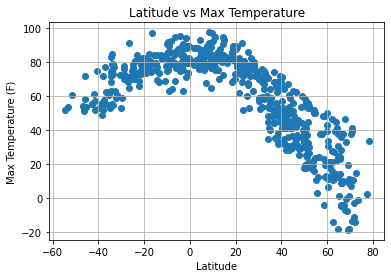

<Figure size 432x288 with 0 Axes>

In [37]:
#latitude vs temp chart
x = weather_df["Latitude"]
y = weather_df["Max Temperature"]
plt.scatter(x,y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs Max Temperature")
plt.show()

# saving
plt.savefig("output/Fig1.png")


## Latitude vs. Humidity Plot

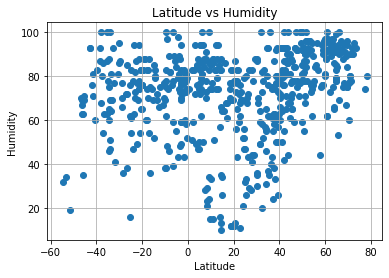

<Figure size 432x288 with 0 Axes>

In [32]:
# scatter plot for latitude vs. humidity
x = weather_df["Latitude"]
y = weather_df["Humidity"]
plt.scatter(x,y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
plt.show()

# saving
plt.savefig("output/Fig2.png")

## Latitude vs. Cloudiness Plot

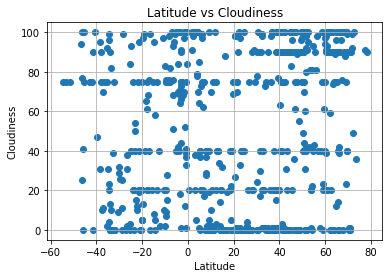

<Figure size 432x288 with 0 Axes>

In [36]:
# scatter plot for latitude vs. cloudiness
x = weather_df["Latitude"]
y = weather_df["Cloudiness"]
plt.scatter(x,y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
plt.show()

# saving
plt.savefig("output/Fig3.png")

## Latitude vs. Wind Speed Plot

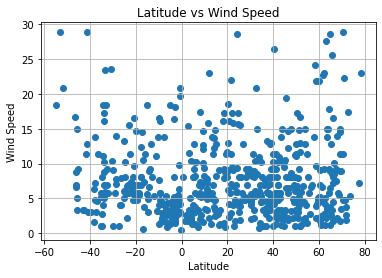

<Figure size 432x288 with 0 Axes>

In [38]:
# scatter plot for latitude vs. wind speed
x = weather_df["Latitude"]
y = weather_df["Wind Speed"]
plt.scatter(x,y)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.show()

# saving
plt.savefig("output/Fig4.png")

## Linear Regression

In [52]:
# OPTIONAL: Create a function to create Linear Regression plots 
def lin_reg_plot(x_values, y_values, y_label, title, coordinates):
    
    # regression for southern hem
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="black")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [53]:
# Create Northern and Southern Hemisphere DataFrames

north_hem_df = weather_df.loc[(weather_df["Latitude"] >= 0)]
south_hem_df = weather_df.loc[(weather_df["Latitude"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8885301853417725


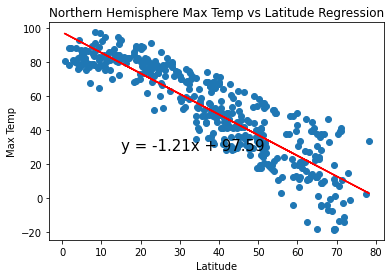

In [54]:
x_values = north_hem_df["Latitude"]
y_values = north_hem_df["Max Temperature"]
lin_reg_plot(x_values, y_values, 'Max Temp', "Northern Hemisphere Max Temp vs Latitude Regression",(15,28))

In [ ]:
# Solid correlation. Indicates that max temp and latitude have an inverse relationship in the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7206466571916758


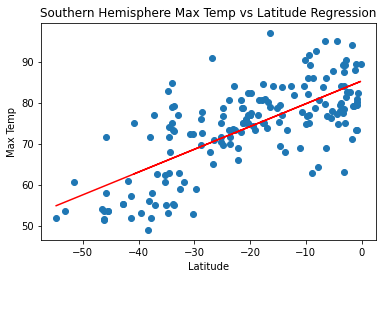

In [55]:
x_values = south_hem_df["Latitude"]
y_values = south_hem_df["Max Temperature"]
lin_reg_plot(x_values, y_values, 'Max Temp', "Southern Hemisphere Max Temp vs Latitude Regression",(-50,28))

In [56]:
#Great correlation. As you get closer to equator max temp seems to increase. 
#General positive correlation with temp and latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.38990493469342474


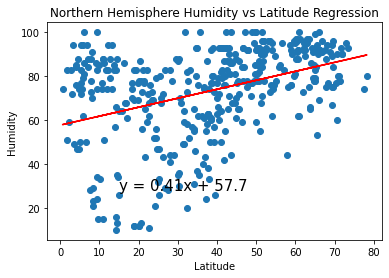

In [57]:
x_values = north_hem_df["Latitude"]
y_values = north_hem_df["Humidity"]
lin_reg_plot(x_values, y_values, 'Humidity', "Northern Hemisphere Humidity vs Latitude Regression",(15,28))

In [58]:
#Very weak correlation. Hard to establish any relationship here.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.38990493469342474


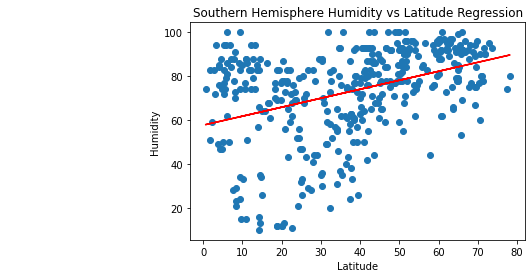

In [59]:
x_values = north_hem_df["Latitude"]
y_values = north_hem_df["Humidity"]
lin_reg_plot(x_values, y_values, 'Humidity', "Southern Hemisphere Humidity vs Latitude Regression",(-50,28))

In [60]:
#Very weak correlation. Hard to establish any relationship here.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2896233995584163


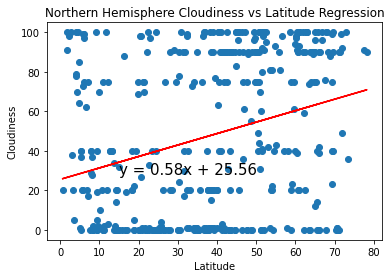

In [61]:
x_values = north_hem_df["Latitude"]
y_values = north_hem_df["Cloudiness"]
lin_reg_plot(x_values, y_values, 'Cloudiness', "Northern Hemisphere Cloudiness vs Latitude Regression",(15,28))

In [30]:
#No real correlation. There seem to be clusters of cloudiness packets but that is consistent throughout latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2896233995584163


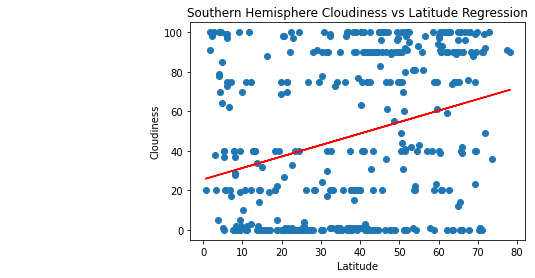

In [62]:
x_values = north_hem_df["Latitude"]
y_values = north_hem_df["Cloudiness"]
lin_reg_plot(x_values, y_values, 'Cloudiness', "Southern Hemisphere Cloudiness vs Latitude Regression",(-50,28))

In [63]:
#No correlation. Cloudiness is sporadic.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08293245368171649


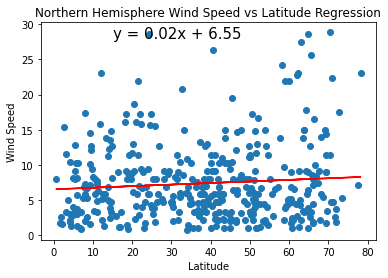

In [64]:
x_values = north_hem_df["Latitude"]
y_values = north_hem_df["Wind Speed"]
lin_reg_plot(x_values, y_values, 'Wind Speed', "Northern Hemisphere Wind Speed vs Latitude Regression",(15,28))

In [65]:
#No correlation. No real relationship.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08293245368171649


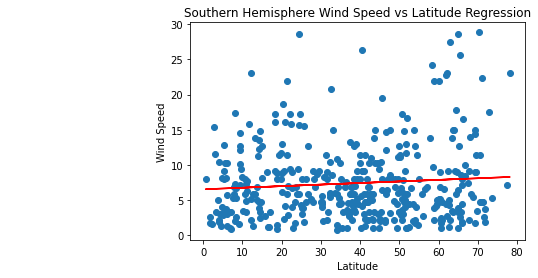

In [68]:
x_values = north_hem_df["Latitude"]
y_values = north_hem_df["Wind Speed"]
lin_reg_plot(x_values, y_values, 'Wind Speed', "Southern Hemisphere Wind Speed vs Latitude Regression",(-50,28))

In [69]:
#Slightly more correlation. Southern hemisphere seems to have wider distribution of wind speed than northern hemisphere.